# Problem 1
(a) Because the units used by Joe and his boss are different. So the variances are different, which will let PCA generate wrong results. 

(b) They should do standardizations

# Problem 2
- (a)

  $
  x = 
  \begin{bmatrix}
    \alpha & \alpha \\
    -\alpha & -\alpha \\
    \beta & \beta \\
    -\beta & -\beta \\
  \end{bmatrix} \\
  $

  $
  Cov(\mathbf{x})
  = (\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^T
  $
  $
  = \frac{1}{N-1}(\mathbf{x}^T\mathbf{x})\\
  $
  $
  = \frac{1}{3}
  \begin{bmatrix}
    \alpha & -\alpha & -\beta & \beta \\
    \alpha & -\alpha & \beta & -\beta \\
  \end{bmatrix}
  \begin{bmatrix}
    \alpha & \alpha \\
    -\alpha & -\alpha \\
    \beta & \beta \\
    -\beta & -\beta \\
  \end{bmatrix} \\
  $
  $
  = \frac{1}{3}
  \begin{bmatrix}
    2(\alpha^2+\beta^2) & 2(\alpha^2-\beta^2) \\
    2(\alpha^2-\beta^2) & 2(\alpha^2+\beta^2) \\
  \end{bmatrix} \\
  $
  $
  = \frac{2}{3}
  \begin{bmatrix}
    (\alpha^2+\beta^2) & (\alpha^2-\beta^2) \\
    (\alpha^2-\beta^2) & (\alpha^2+\beta^2) \\
  \end{bmatrix}
  $

- (b) To get eigenvalue $\lambda$

  $
  (A-\lambda I)\mathbf{x}=0 \\
  $

  $
  For \
  \lambda=\frac{4}{3}\alpha^2
  (\mathbf{A}-\lambda \mathbf{I})\mathbf{x} = \frac{2}{3}
  \begin{bmatrix}
    (-\alpha^2+\beta^2) & (\alpha^2-\beta^2) \\
    (\alpha^2-\beta^2) & (-\alpha^2+\beta^2) \\
  \end{bmatrix}
  \mathbf{x}=0, \
  x = 
  \begin{bmatrix}
    1 \\
    1 \\
  \end{bmatrix}
  $

  $
  For\
  \lambda=\frac{4}{3}\beta^2
  (\mathbf{A}-\lambda \mathbf{I})\mathbf{x} = \frac{2}{3}
  \begin{bmatrix}
    (\alpha^2-\beta^2) & (\alpha^2-\beta^2) \\
    (\alpha^2-\beta^2) & (\alpha^2-\beta^2) \\
  \end{bmatrix}
  \mathbf{x}=0, \
   x = 
  \begin{bmatrix}
    1 \\
    -1 \\
  \end{bmatrix}
  $

  The values of $\alpha^2$ and $\beta^2$ are independent to eigenvectors. The eigenvalues are getting larger if $\alpha$ and $\beta$ are larger, eigenvalues are smaller if $\alpha$ and $\beta$ are smaller.

# Problem 3

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

In [2]:
mat_data = scipy.io.loadmat('04HW2_noisy.mat')

(560, 1965)
View the 10th image.


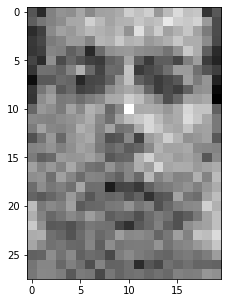

In [8]:
x = mat_data['X']
print(x.shape)
img_10th = x[:, 10].reshape(28, 20)

print('View the 10th image.')
plt.figure(figsize=(5, 5))
plt.imshow(img_10th, cmap='gray')
plt.show()

## (a)

In [13]:
E, sigma, FT = la.svd(x)
print(E.shape ,sigma.shape, FT.shape)
s = np.eye(E.shape[0], FT.shape[0])
s[:E.shape[0], :E.shape[0]] = np.diag(sigma)
print(E.shape, s.shape, FT.shape)

(560, 560) (560,) (1965, 1965)
(560, 560) (560, 1965) (1965, 1965)


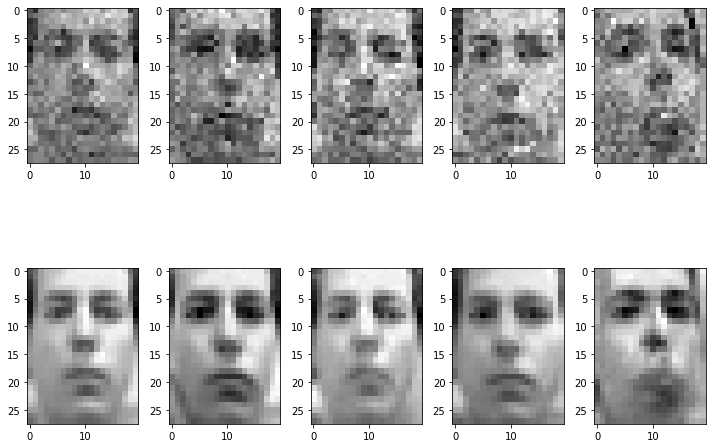

In [17]:
plt.figure(figsize=(10, 8))

k = [10, 121, 225, 318, 426]
eigenvalues = s.copy()
eigenvalues[10::] = 0 # 只取前10個 eigenvalue, 其他的都設為0
pca = E.dot(eigenvalues).dot(FT)

for index, image in enumerate(k, 1):
    plt.subplot(2, 5, index)
    plt.imshow(x[:, image].reshape(28,20), cmap='gray')
    plt.subplot(2, 5, index+5)
    plt.imshow(pca[:, image].reshape(28,20), cmap='gray')

plt.tight_layout()
plt.show()


## (b)

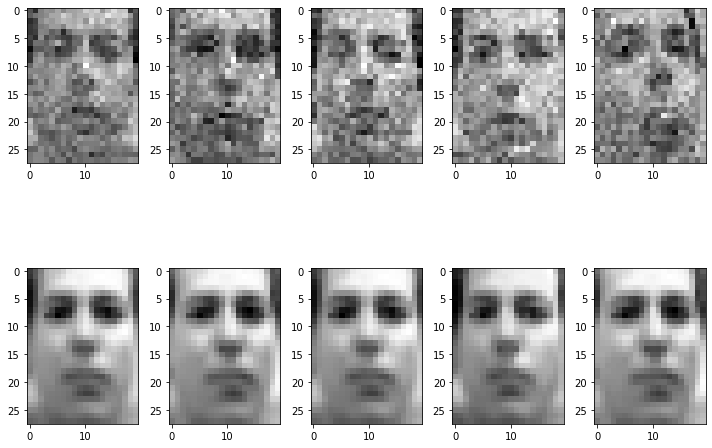

In [18]:
plt.figure(figsize=(10, 8))

k = [10, 121, 225, 318, 426]
eigenvalues = s.copy()
eigenvalues[2::] = 0 # 只取前2個 eigenvalue, 其他的都設為0
pca = E.dot(eigenvalues).dot(FT)

for index, image in enumerate(k, 1):
    plt.subplot(2, 5, index)
    plt.imshow(x[:, image].reshape(28,20), cmap='gray')
    plt.subplot(2, 5, index+5)
    plt.imshow(pca[:, image].reshape(28,20), cmap='gray')

plt.tight_layout()
plt.show()

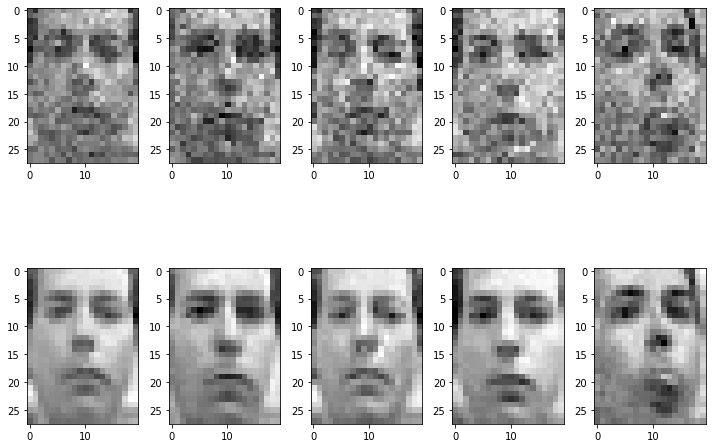

In [134]:
plt.figure(figsize=(10, 8))

k = [10, 121, 225, 318, 426]
eigenvalues = s.copy()
eigenvalues[30::] = 0 # 只取前30個 eigenvalue, 其他的都設為0
pca = E.dot(eigenvalues).dot(FT)

for index, image in enumerate(k, 1):
    plt.subplot(2, 5, index)
    plt.imshow(x[:, image].reshape(28,20), cmap='gray')
    plt.subplot(2, 5, index+5)
    plt.imshow(pca[:, image].reshape(28,20), cmap='gray')

plt.tight_layout()
plt.show()

## (c)

In [54]:
PC = E.T.dot(x)
cov = np.cov(PC)
# eigenvalues, eigenvectors = np.linalg.eig(cov)
cov = cov.reshape(1,-1)
cov = np.array(sorted(cov, reverse=True))
print(cov.shape)
cum_eigenvalues = np.cumsum(cov)
print(cum_eigenvalues)
total = cum_eigenvalues[-1]
print(total)
percentage_cum_var_sum = cum_eigenvalues/total

desired_variance_ratio = 0.95
best = np.argmax(percentage_cum_var_sum>=desired_variance_ratio)+1

print(best)

# var_exp = np.array([(i / total)*100 for i in eigenvalues])
# plt.figure(figsize=(10, 8))
# plt.xlabel('Components Number')
# plt.ylabel('Precentage of Variance')
# plt.scatter(np.arange(var_exp.shape[0]), var_exp)
# plt.plot(np.arange(var_exp.shape[0]), var_exp)
# plt.show()

# eigenvalues = s.copy()
# eigenvalues = eigenvalues[:best,:best] # 只取前10個 eigenvalue, 其他的都設為0
# print(eigenvalues.shape)
# selected_E = E[:, :best]
# selected_FT = FT[:best, :]
# print(selected_E.shape, selected_FT.shape)
# pca = selected_E.dot(eigenvalues).dot(selected_FT)

TypeError: 'reverse' is an invalid keyword argument for sort()

num_components: 2


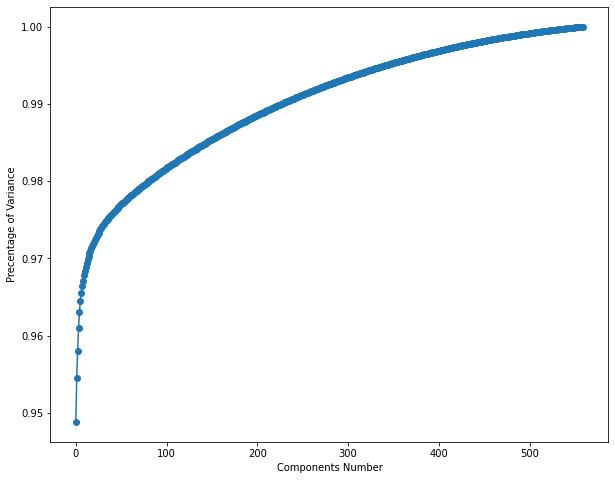

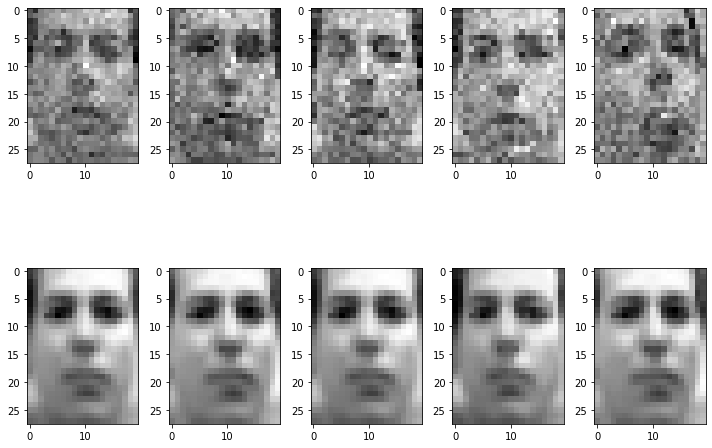

In [40]:


U, Sigma, VT = np.linalg.svd(x, full_matrices=False)
explained_variance_ratio = (Sigma ** 2) / np.sum(Sigma ** 2)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# 根據需求，選擇一個閾值或其他標準，例如 95% 的解釋變異比例
desired_variance_ratio = 0.95
num_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1
print(f'num_components: {num_components}')

plt.figure(figsize=(10, 8))
plt.xlabel('Components Number')
plt.ylabel('Precentage of Variance')
plt.scatter(np.arange(cumulative_explained_variance.shape[0]), cumulative_explained_variance)
plt.plot(np.arange(cumulative_explained_variance.shape[0]), cumulative_explained_variance)
plt.show()

# 選擇前 num_components 個特徵向量和對應的奇異值
selected_U = U[:, :num_components]
selected_Sigma = np.diag(Sigma[:num_components])
selected_VT = VT[:num_components, :]
pca = selected_U.dot(selected_Sigma).dot(selected_VT)

k = [10, 121, 225, 318, 426]
plt.figure(figsize=(10, 8))
for index, image in enumerate(k, 1):
    plt.subplot(2, 5, index)
    plt.imshow(x[:, image].reshape(28,20), cmap='gray')
    plt.subplot(2, 5, index+5)
    plt.imshow(pca[:, image].reshape(28,20), cmap='gray')

plt.tight_layout()
plt.show()


We used the percentage variance $\frac{\sigma_i^2}{\Sigma\sigma_i^2}$ to determine the best intrinsic dimensionality in 95% of variance ratio. \
The best is 2.